# はじめてのニューラルネットワーク：分類問題の初歩
- [はじめてのニューラルネットワーク：分類問題の初歩](https://www.tensorflow.org/tutorials/keras/classification?hl=ja)
- 第2版 TensoerFlow による実践機械学習

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# 画像(0~9の数値)認識のためのデータセット
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

# クラスの種類
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
# 検証データとテストデータに分割及び、画像データは 0-1 の範囲に修正
x_valid, x_train = x_train_full[:5000] / 255, x_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# データサイズの確認
print(x_train.shape, x_test.shape, x_valid.shape)
print(y_train.shape, y_test.shape, y_valid.shape)

(55000, 28, 28) (10000, 28, 28) (5000, 28, 28)
(55000,) (10000,) (5000,)


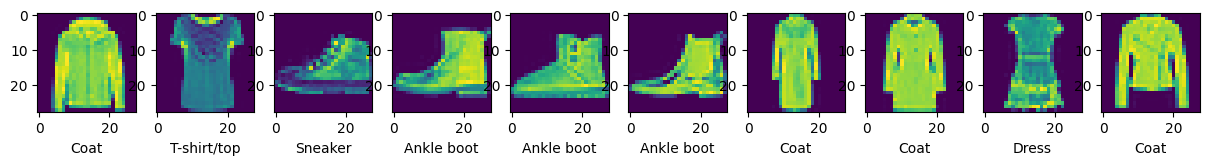

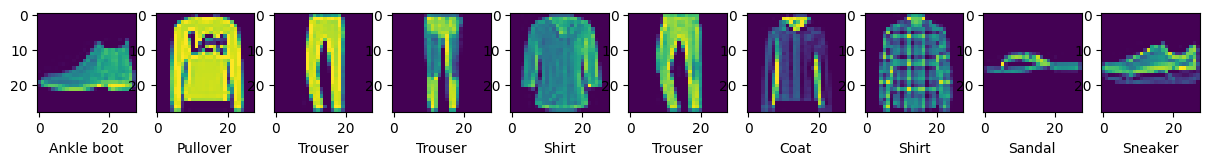

In [17]:
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_test[i])
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [18]:
# 機械学習モデルの構築
model = tf.keras.models.Sequential(name='fashion_mnist')
# 28x28の元データを784の縦ベクトルに変換
model.add(tf.keras.layers.Flatten(input_shape=(28, 28), name='Flatten'))
# ???個のニューロンを持つ隠れ層
model.add(tf.keras.layers.Dense(128, activation="relu", name='Dense300'))
# 10個のニューロンを持つ出力層
model.add(tf.keras.layers.Dense(10, activation="softmax", name='Dense10'))

# # 別の書き方(同じ意味)
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28)),
#     tf.keras.layers.Dense(300, activation="relu"),
#     tf.keras.layers.Dense(100, activation="relu"),
#     tf.keras.layers.Dense(10, activation="softmax"),
# ])

model.summary()

c:\Users\JY810251\python\TensorFlow_training\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "fashion_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense300 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense10 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# 重みとバイアスの確認
dense1 = model.layers[1]
weights, biases = dense1.get_weights()
print(weights.shape)
print(biases.shape)

(784, 128)
(128,)


In [21]:
# モデルの構成とコンパイル 学習時のモデルを設定する
# model.compile(
#     optimizer='sgd',
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=['accuracy'],
# )

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [22]:
# 損失最小化のためのパラメータフィット
# history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))
history = model.fit(x_train_full, y_train_full, epochs=10)

Epoch 1/10


c:\Users\JY810251\python\TensorFlow_training\.venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6707 - loss: 9.7957
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7467 - loss: 0.7146
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7887 - loss: 0.6190
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8141 - loss: 0.5285
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8189 - loss: 0.5135
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8307 - loss: 0.4917
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8334 - loss: 0.4896
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8350 - loss: 0.4787
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8395 - loss: 0.4705
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8368 - loss: 0.4794


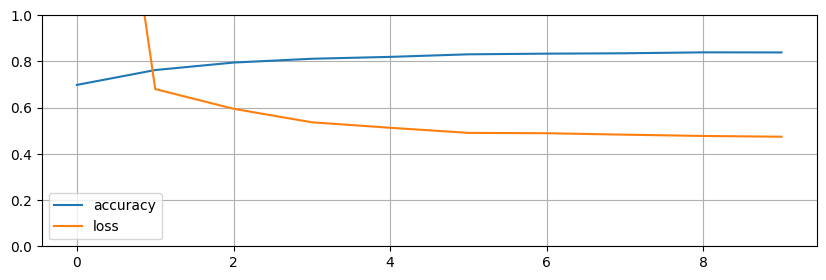

In [23]:
df = pd.DataFrame(history.history)
df.plot(figsize=(10, 3))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [24]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f'Test accuracy: {test_acc:.3f}', )

c:\Users\JY810251\python\TensorFlow_training\.venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 - 1s - 2ms/step - accuracy: 0.8314 - loss: 0.5279
Test accuracy: 0.831


In [25]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [26]:
predictions = probability_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [29]:
for i in range(10):
    # print(list(predictions[i]))
    print(f'予測: {np.argmax(predictions[i])}, 正解: {y_test[i]}')

予測: 9, 正解: 9
予測: 2, 正解: 2
予測: 1, 正解: 1
予測: 1, 正解: 1
予測: 6, 正解: 6
予測: 1, 正解: 1
予測: 4, 正解: 4
予測: 4, 正解: 6
予測: 5, 正解: 5
予測: 7, 正解: 7
